In [2]:
%matplotlib inline
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import scipy as sp
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("Hadi Hamad test file 2020-09-06-1458.csv")
df.head()

,id,nationality,Maid Type (wlak-in / operator),date of joining the company,first time to get hired by a client,Times Hired by a client,Times her client cancelled his contract,Times her client replaced her,Nbr. Of Days Hired,Nbr. Of days unemployed (available),Complaint Number,Number Of Interviews done,Number of successful interviews (if exists),date left,current status,mode of termination
0,13514,Ethiopian,FREEDOM_OPERATOR,NaN,NaN,0,0,0,0,0,0,0,0,NaN,UNREACHABLE_AFTER_EXIT,NaN
1,13515,Ethiopian,FREEDOM_OPERATOR,2/18/19 9:47,2/18/19 9:47,6,0,6,477,75,15,16,6,NaN,WITH_CLIENT,NaN
2,13516,Ethiopian,FREEDOM_OPERATOR,3/8/19 15:31,3/8/19 15:31,2,1,0,513,8,2,2,2,NaN,WITH_CLIENT,NaN
3,13517,Ethiopian,FREEDOM_OPERATOR,NaN,NaN,0,0,0,0,0,0,0,0,NaN,UNREACHABLE_AFTER_EXIT,NaN
4,13518,Ethiopian,FREEDOM_OPERATOR,NaN,NaN,0,0,0,0,0,0,0,0,NaN,UNREACHABLE_AFTER_EXIT,NaN


In [4]:
df[df["date of joining the company"].isna()]

,id,nationality,Maid Type (wlak-in / operator),date of joining the company,first time to get hired by a client,Times Hired by a client,Times her client cancelled his contract,Times her client replaced her,Nbr. Of Days Hired,Nbr. Of days unemployed (available),Complaint Number,Number Of Interviews done,Number of successful interviews (if exists),date left,current status,mode of termination
0,13514,Ethiopian,FREEDOM_OPERATOR,NaN,NaN,0,0,0,0,0,0,0,0,NaN,UNREACHABLE_AFTER_EXIT,NaN
3,13517,Ethiopian,FREEDOM_OPERATOR,NaN,NaN,0,0,0,0,0,0,0,0,NaN,UNREACHABLE_AFTER_EXIT,NaN
4,13518,Ethiopian,FREEDOM_OPERATOR,NaN,NaN,0,0,0,0,0,0,0,0,NaN,UNREACHABLE_AFTER_EXIT,NaN
5,13527,Kenyan,FREEDOM_OPERATOR,NaN,NaN,0,0,0,0,0,0,0,0,NaN,VISA_UNSUCCESSFUL,NaN
7,13529,Kenyan,FREEDOM_OPERATOR,NaN,NaN,0,0,0,0,0,0,0,0,NaN,VISA_UNSUCCESSFUL,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2571,22274,Ugandan,WALKIN,NaN,NaN,0,0,0,0,0,0,0,0,NaN,LANDED_IN_DUBAI,NaN
2572,22279,Ugandan,WALKIN,NaN,NaN,0,0,0,0,0,0,0,0,NaN,LANDED_IN_DUBAI,NaN
2573,22280,Kenyan,WALKIN,NaN,NaN,0,0,0,0,0,0,0,0,NaN,LANDED_IN_DUBAI,NaN
2574,22281,Ugandan,WALKIN,NaN,NaN,0,0,0,0,0,0,0,0,NaN,LANDED_IN_DUBAI,NaN


In [5]:
len(df)

2576

In [6]:
df[df["date of joining the company"].isna()].index

Int64Index([   0,    3,    4,    5,    7,    9,   13,   16,   17,   18,
            ...
            2566, 2567, 2568, 2569, 2570, 2571, 2572, 2573, 2574, 2575],
           dtype='int64', length=1475)

In [7]:
df.drop(df[df["date of joining the company"].isna()].index, inplace=True)

In [8]:
operator_df = df[df["Maid Type (wlak-in / operator)"] == "FREEDOM_OPERATOR"]
operator_df

,id,nationality,Maid Type (wlak-in / operator),date of joining the company,first time to get hired by a client,Times Hired by a client,Times her client cancelled his contract,Times her client replaced her,Nbr. Of Days Hired,Nbr. Of days unemployed (available),Complaint Number,Number Of Interviews done,Number of successful interviews (if exists),date left,current status,mode of termination
1,13515,Ethiopian,FREEDOM_OPERATOR,2/18/19 9:47,2/18/19 9:47,6,0,6,477,75,15,16,6,NaN,WITH_CLIENT,NaN
2,13516,Ethiopian,FREEDOM_OPERATOR,3/8/19 15:31,3/8/19 15:31,2,1,0,513,8,2,2,2,NaN,WITH_CLIENT,NaN
6,13528,Kenyan,FREEDOM_OPERATOR,3/29/19 0:00,4/16/19 16:45,1,1,0,69,90,0,7,1,10/8/19 0:00,EMPLOYEMENT_TERMINATED,FIRED
8,13530,Kenyan,FREEDOM_OPERATOR,2/22/19 0:00,2/22/19 16:15,1,0,1,5,41,1,13,1,4/2/19 11:20,EMPLOYEMENT_TERMINATED,FIRED
10,13558,Kenyan,FREEDOM_OPERATOR,2/21/19 20:38,2/21/19 20:38,3,1,1,462,6,6,7,3,NaN,WITH_CLIENT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1918,20550,Ethiopian,FREEDOM_OPERATOR,3/26/20 0:00,3/30/20 16:25,2,0,1,4,34,4,7,2,NaN,WITH_CLIENT,NaN
1920,20552,Ethiopian,FREEDOM_OPERATOR,3/11/20 0:00,3/11/20 17:31,1,1,0,81,52,4,1,1,8/5/20 0:00,EMPLOYEMENT_TERMINATED,FIRED
1925,20576,Ethiopian,FREEDOM_OPERATOR,3/7/20 0:00,3/7/20 18:08,5,0,4,52,10,5,9,5,NaN,WITH_CLIENT,NaN
1928,20584,Ethiopian,FREEDOM_OPERATOR,3/15/20 0:00,3/15/20 14:38,4,0,3,75,37,9,9,4,NaN,WITH_CLIENT,QUIT


In [9]:
walkin_df = df[df["Maid Type (wlak-in / operator)"] == "WALKIN"]
walkin_df

,id,nationality,Maid Type (wlak-in / operator),date of joining the company,first time to get hired by a client,Times Hired by a client,Times her client cancelled his contract,Times her client replaced her,Nbr. Of Days Hired,Nbr. Of days unemployed (available),Complaint Number,Number Of Interviews done,Number of successful interviews (if exists),date left,current status,mode of termination
641,15238,Cameroonian,WALKIN,6/16/19 0:00,6/16/19 19:29,2,0,1,37,6,1,7,2,NaN,WITH_CLIENT,NaN
751,15522,Ugandan,WALKIN,5/25/19 15:16,5/25/19 15:16,4,0,4,202,61,13,20,4,2/19/20 0:00,EMPLOYEMENT_TERMINATED,FIRED
771,15546,Ugandan,WALKIN,6/1/19 16:36,6/1/19 16:36,2,0,1,2,9,5,8,2,NaN,WITH_CLIENT,NaN
788,15568,Zimbabwean,WALKIN,6/10/19 0:00,7/5/19 17:37,2,0,1,414,47,3,8,2,NaN,WITH_CLIENT,NaN
793,15578,Kenyan,WALKIN,5/23/19 16:09,5/23/19 16:09,3,1,1,63,6,4,9,3,NaN,WITH_CLIENT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2532,21798,Liberian,WALKIN,7/18/20 0:00,7/18/20 15:23,1,0,1,12,42,3,1,1,NaN,PENDING_FOR_DISCIPLINE,NaN
2534,21802,Cameroonian,WALKIN,7/17/20 0:00,7/23/20 12:01,2,0,2,16,35,4,2,2,NaN,ASSIGNED_OFFICE_WORK,NaN
2537,21808,Ugandan,WALKIN,7/5/20 21:06,7/5/20 21:06,3,0,2,32,7,5,3,3,NaN,WITH_CLIENT,NaN
2538,21824,Ugandan,WALKIN,7/22/20 0:00,8/26/20 22:35,1,0,0,6,26,0,0,0,NaN,WITH_CLIENT,NaN


#As we can see correlation between the type of maid and client satisfaction is weak and positive, however we can see that on a minor scale, a client is more 

## Question 2 

In [10]:
operator_df.head()

,id,nationality,Maid Type (wlak-in / operator),date of joining the company,first time to get hired by a client,Times Hired by a client,Times her client cancelled his contract,Times her client replaced her,Nbr. Of Days Hired,Nbr. Of days unemployed (available),Complaint Number,Number Of Interviews done,Number of successful interviews (if exists),date left,current status,mode of termination
1,13515,Ethiopian,FREEDOM_OPERATOR,2/18/19 9:47,2/18/19 9:47,6,0,6,477,75,15,16,6,NaN,WITH_CLIENT,NaN
2,13516,Ethiopian,FREEDOM_OPERATOR,3/8/19 15:31,3/8/19 15:31,2,1,0,513,8,2,2,2,NaN,WITH_CLIENT,NaN
6,13528,Kenyan,FREEDOM_OPERATOR,3/29/19 0:00,4/16/19 16:45,1,1,0,69,90,0,7,1,10/8/19 0:00,EMPLOYEMENT_TERMINATED,FIRED
8,13530,Kenyan,FREEDOM_OPERATOR,2/22/19 0:00,2/22/19 16:15,1,0,1,5,41,1,13,1,4/2/19 11:20,EMPLOYEMENT_TERMINATED,FIRED
10,13558,Kenyan,FREEDOM_OPERATOR,2/21/19 20:38,2/21/19 20:38,3,1,1,462,6,6,7,3,NaN,WITH_CLIENT,NaN


In [11]:
operator_df.loc[:,"first time to get hired by a client "] = pd.to_datetime(operator_df["first time to get hired by a client "])
operator_df.loc[:,"date of joining the company"]= pd.to_datetime(operator_df["date of joining the company"])

In [12]:
operator_df["Days till hired"] =  operator_df["first time to get hired by a client "] - operator_df["date of joining the company"]
operator_df

,id,nationality,Maid Type (wlak-in / operator),date of joining the company,first time to get hired by a client,Times Hired by a client,Times her client cancelled his contract,Times her client replaced her,Nbr. Of Days Hired,Nbr. Of days unemployed (available),Complaint Number,Number Of Interviews done,Number of successful interviews (if exists),date left,current status,mode of termination,Days till hired
1,13515,Ethiopian,FREEDOM_OPERATOR,2019-02-18 09:47:00,2019-02-18 09:47:00,6,0,6,477,75,15,16,6,NaN,WITH_CLIENT,NaN,0 days 00:00:00
2,13516,Ethiopian,FREEDOM_OPERATOR,2019-03-08 15:31:00,2019-03-08 15:31:00,2,1,0,513,8,2,2,2,NaN,WITH_CLIENT,NaN,0 days 00:00:00
6,13528,Kenyan,FREEDOM_OPERATOR,2019-03-29 00:00:00,2019-04-16 16:45:00,1,1,0,69,90,0,7,1,10/8/19 0:00,EMPLOYEMENT_TERMINATED,FIRED,18 days 16:45:00
8,13530,Kenyan,FREEDOM_OPERATOR,2019-02-22 00:00:00,2019-02-22 16:15:00,1,0,1,5,41,1,13,1,4/2/19 11:20,EMPLOYEMENT_TERMINATED,FIRED,0 days 16:15:00
10,13558,Kenyan,FREEDOM_OPERATOR,2019-02-21 20:38:00,2019-02-21 20:38:00,3,1,1,462,6,6,7,3,NaN,WITH_CLIENT,NaN,0 days 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1918,20550,Ethiopian,FREEDOM_OPERATOR,2020-03-26 00:00:00,2020-03-30 16:25:00,2,0,1,4,34,4,7,2,NaN,WITH_CLIENT,NaN,4 days 16:25:00
1920,20552,Ethiopian,FREEDOM_OPERATOR,2020-03-11 00:00:00,2020-03-11 17:31:00,1,1,0,81,52,4,1,1,8/5/20 0:00,EMPLOYEMENT_TERMINATED,FIRED,0 days 17:31:00
1925,20576,Ethiopian,FREEDOM_OPERATOR,2020-03-07 00:00:00,2020-03-07 18:08:00,5,0,4,52,10,5,9,5,NaN,WITH_CLIENT,NaN,0 days 18:08:00
1928,20584,Ethiopian,FREEDOM_OPERATOR,2020-03-15 00:00:00,2020-03-15 14:38:00,4,0,3,75,37,9,9,4,NaN,WITH_CLIENT,QUIT,0 days 14:38:00


In [13]:
operator_df["Days till hired"].mean()

Timedelta('4 days 00:21:13.388429')

In [14]:
walkin_df.loc[:,"first time to get hired by a client "] = pd.to_datetime(walkin_df["first time to get hired by a client "])
walkin_df.loc[:,"date of joining the company"]= pd.to_datetime(walkin_df["date of joining the company"])

In [15]:
walkin_df["Days till hired"] =  walkin_df["first time to get hired by a client "] - walkin_df["date of joining the company"]
walkin_df

,id,nationality,Maid Type (wlak-in / operator),date of joining the company,first time to get hired by a client,Times Hired by a client,Times her client cancelled his contract,Times her client replaced her,Nbr. Of Days Hired,Nbr. Of days unemployed (available),Complaint Number,Number Of Interviews done,Number of successful interviews (if exists),date left,current status,mode of termination,Days till hired
641,15238,Cameroonian,WALKIN,2019-06-16 00:00:00,2019-06-16 19:29:00,2,0,1,37,6,1,7,2,NaN,WITH_CLIENT,NaN,0 days 19:29:00
751,15522,Ugandan,WALKIN,2019-05-25 15:16:00,2019-05-25 15:16:00,4,0,4,202,61,13,20,4,2/19/20 0:00,EMPLOYEMENT_TERMINATED,FIRED,0 days 00:00:00
771,15546,Ugandan,WALKIN,2019-06-01 16:36:00,2019-06-01 16:36:00,2,0,1,2,9,5,8,2,NaN,WITH_CLIENT,NaN,0 days 00:00:00
788,15568,Zimbabwean,WALKIN,2019-06-10 00:00:00,2019-07-05 17:37:00,2,0,1,414,47,3,8,2,NaN,WITH_CLIENT,NaN,25 days 17:37:00
793,15578,Kenyan,WALKIN,2019-05-23 16:09:00,2019-05-23 16:09:00,3,1,1,63,6,4,9,3,NaN,WITH_CLIENT,NaN,0 days 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2532,21798,Liberian,WALKIN,2020-07-18 00:00:00,2020-07-18 15:23:00,1,0,1,12,42,3,1,1,NaN,PENDING_FOR_DISCIPLINE,NaN,0 days 15:23:00
2534,21802,Cameroonian,WALKIN,2020-07-17 00:00:00,2020-07-23 12:01:00,2,0,2,16,35,4,2,2,NaN,ASSIGNED_OFFICE_WORK,NaN,6 days 12:01:00
2537,21808,Ugandan,WALKIN,2020-07-05 21:06:00,2020-07-05 21:06:00,3,0,2,32,7,5,3,3,NaN,WITH_CLIENT,NaN,0 days 00:00:00
2538,21824,Ugandan,WALKIN,2020-07-22 00:00:00,2020-08-26 22:35:00,1,0,0,6,26,0,0,0,NaN,WITH_CLIENT,NaN,35 days 22:35:00


In [16]:
walkin_df["Days till hired"].mean()

Timedelta('2 days 23:56:26.191950')

### As a result we can see that on average walkin maids get hired faster than operator maids. 

## Question 3

In [17]:
def type_to_numeric(maid_type):
    if maid_type == "WALKIN":
        return 1
    elif maid_type == "FREEDOM_OPERATOR":
        return 2
    else:
        return np.nan    

In [18]:
df["maid_type"] = df["Maid Type (wlak-in / operator)"].apply(type_to_numeric)
df

,id,nationality,Maid Type (wlak-in / operator),date of joining the company,first time to get hired by a client,Times Hired by a client,Times her client cancelled his contract,Times her client replaced her,Nbr. Of Days Hired,Nbr. Of days unemployed (available),Complaint Number,Number Of Interviews done,Number of successful interviews (if exists),date left,current status,mode of termination,maid_type
1,13515,Ethiopian,FREEDOM_OPERATOR,2/18/19 9:47,2/18/19 9:47,6,0,6,477,75,15,16,6,NaN,WITH_CLIENT,NaN,2
2,13516,Ethiopian,FREEDOM_OPERATOR,3/8/19 15:31,3/8/19 15:31,2,1,0,513,8,2,2,2,NaN,WITH_CLIENT,NaN,2
6,13528,Kenyan,FREEDOM_OPERATOR,3/29/19 0:00,4/16/19 16:45,1,1,0,69,90,0,7,1,10/8/19 0:00,EMPLOYEMENT_TERMINATED,FIRED,2
8,13530,Kenyan,FREEDOM_OPERATOR,2/22/19 0:00,2/22/19 16:15,1,0,1,5,41,1,13,1,4/2/19 11:20,EMPLOYEMENT_TERMINATED,FIRED,2
10,13558,Kenyan,FREEDOM_OPERATOR,2/21/19 20:38,2/21/19 20:38,3,1,1,462,6,6,7,3,NaN,WITH_CLIENT,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2532,21798,Liberian,WALKIN,7/18/20 0:00,7/18/20 15:23,1,0,1,12,42,3,1,1,NaN,PENDING_FOR_DISCIPLINE,NaN,1
2534,21802,Cameroonian,WALKIN,7/17/20 0:00,7/23/20 12:01,2,0,2,16,35,4,2,2,NaN,ASSIGNED_OFFICE_WORK,NaN,1
2537,21808,Ugandan,WALKIN,7/5/20 21:06,7/5/20 21:06,3,0,2,32,7,5,3,3,NaN,WITH_CLIENT,NaN,1
2538,21824,Ugandan,WALKIN,7/22/20 0:00,8/26/20 22:35,1,0,0,6,26,0,0,0,NaN,WITH_CLIENT,NaN,1


In [19]:
np.corrcoef(df["Complaint Number"], df["maid_type"])

array([[ 1.        , -0.10371737],
       [-0.10371737,  1.        ]])

In [20]:
np.corrcoef(df["Times her client cancelled his contract"], df["maid_type"])

array([[1.      , 0.117046],
       [0.117046, 1.      ]])

[Text(0, 0.5, 'Cancelation rate'), Text(0.5, 0, 'maid_type')]

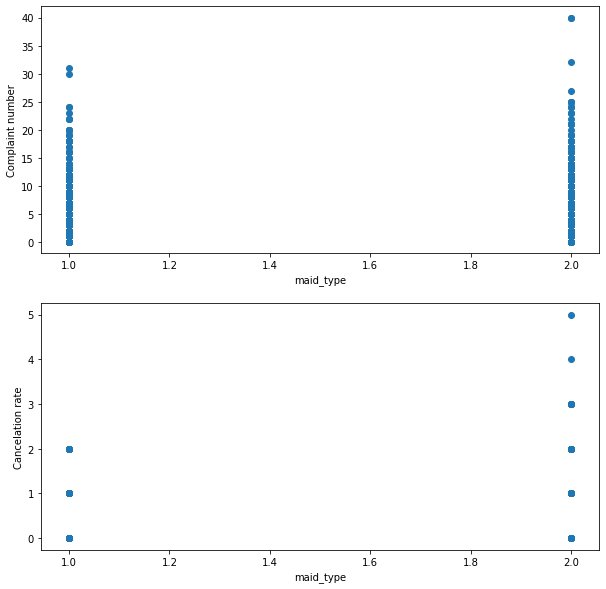

In [21]:
fig, (ax1, ax2) = plt.subplots(ncols = 1,
                               nrows = 2,
                              figsize= (10,10))
ax1.scatter(df["maid_type"] ,df["Complaint Number"])
ax1.set(xlabel = "maid_type", ylabel = "Complaint number")

ax2.scatter(df["maid_type"], df["Times her client cancelled his contract"])
ax2.set(xlabel = "maid_type", ylabel = "Cancelation rate")

In [22]:
operator_df["Times her client cancelled his contract"].mean()

0.33507853403141363

In [23]:
walkin_df["Times her client cancelled his contract"].mean()

0.18694362017804153

In [24]:
m2 = operator_df["Complaint Number"].mean()
m2

5.2539267015706805

In [25]:
m1 = walkin_df["Complaint Number"].mean()
m1

6.516320474777448

In [26]:
df.columns

Index(['id', 'nationality', 'Maid Type (wlak-in / operator)',
       'date of joining the company', 'first time to get hired by a client ',
       'Times Hired by a client', 'Times her client cancelled his contract',
       'Times her client replaced her', 'Nbr. Of Days Hired',
       'Nbr. Of days unemployed (available)', 'Complaint Number',
       'Number Of Interviews done',
       'Number of successful interviews (if exists)', 'date left',
       'current status', 'mode of termination', 'maid_type'],
      dtype='object')

In [27]:
from scipy.stats import pointbiserialr

In [28]:
pbc = pointbiserialr(df["maid_type"],df["Complaint Number"])
pbc

PointbiserialrResult(correlation=-0.10371737042730812, pvalue=0.0005671220227807772)

In [29]:
pbc2 = pointbiserialr(df["maid_type"],df["Times her client cancelled his contract"])
pbc2

PointbiserialrResult(correlation=0.11704599864857873, pvalue=9.912812781105417e-05)

In [30]:
df["failed interviews"] = df["Number Of Interviews done"]-df["Number of successful interviews (if exists)"]
df

,id,nationality,Maid Type (wlak-in / operator),date of joining the company,first time to get hired by a client,Times Hired by a client,Times her client cancelled his contract,Times her client replaced her,Nbr. Of Days Hired,Nbr. Of days unemployed (available),Complaint Number,Number Of Interviews done,Number of successful interviews (if exists),date left,current status,mode of termination,maid_type,failed interviews
1,13515,Ethiopian,FREEDOM_OPERATOR,2/18/19 9:47,2/18/19 9:47,6,0,6,477,75,15,16,6,NaN,WITH_CLIENT,NaN,2,10
2,13516,Ethiopian,FREEDOM_OPERATOR,3/8/19 15:31,3/8/19 15:31,2,1,0,513,8,2,2,2,NaN,WITH_CLIENT,NaN,2,0
6,13528,Kenyan,FREEDOM_OPERATOR,3/29/19 0:00,4/16/19 16:45,1,1,0,69,90,0,7,1,10/8/19 0:00,EMPLOYEMENT_TERMINATED,FIRED,2,6
8,13530,Kenyan,FREEDOM_OPERATOR,2/22/19 0:00,2/22/19 16:15,1,0,1,5,41,1,13,1,4/2/19 11:20,EMPLOYEMENT_TERMINATED,FIRED,2,12
10,13558,Kenyan,FREEDOM_OPERATOR,2/21/19 20:38,2/21/19 20:38,3,1,1,462,6,6,7,3,NaN,WITH_CLIENT,NaN,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2532,21798,Liberian,WALKIN,7/18/20 0:00,7/18/20 15:23,1,0,1,12,42,3,1,1,NaN,PENDING_FOR_DISCIPLINE,NaN,1,0
2534,21802,Cameroonian,WALKIN,7/17/20 0:00,7/23/20 12:01,2,0,2,16,35,4,2,2,NaN,ASSIGNED_OFFICE_WORK,NaN,1,0
2537,21808,Ugandan,WALKIN,7/5/20 21:06,7/5/20 21:06,3,0,2,32,7,5,3,3,NaN,WITH_CLIENT,NaN,1,0
2538,21824,Ugandan,WALKIN,7/22/20 0:00,8/26/20 22:35,1,0,0,6,26,0,0,0,NaN,WITH_CLIENT,NaN,1,0


In [31]:
pbc3 = pointbiserialr(df["maid_type"],df["failed interviews"])
pbc3

PointbiserialrResult(correlation=0.14812138010870096, pvalue=7.952308772822197e-07)

In [32]:
np.corrcoef(df["maid_type"],df["failed interviews"])

array([[1.        , 0.14812138],
       [0.14812138, 1.        ]])

In [33]:
len(df["maid_type"])

1101

In [34]:
EmployeeNbr=1101

In [35]:
df[df["mode of termination"]=="FIRED"].count()

id                                             322
nationality                                    322
Maid Type (wlak-in / operator)                 322
date of joining the company                    322
first time to get hired by a client            287
Times Hired by a client                        322
Times her client cancelled his contract        322
Times her client replaced her                  322
Nbr. Of Days Hired                             322
Nbr. Of days unemployed (available)            322
Complaint Number                               322
Number Of Interviews done                      322
Number of successful interviews (if exists)    322
date left                                      318
current status                                 322
mode of termination                            322
maid_type                                      322
failed interviews                              322
dtype: int64

In [36]:
Employeeleft=322

In [37]:
Employeestill=1101-322

In [38]:
Employeestill

779

In [39]:
Total=Employeestill+EmployeeNbr

In [40]:
Rate=Employeeleft/Total
Rate=Rate*2

In [41]:
TermRate=Rate*100
TermRate

34.25531914893617

In [42]:
np.corrcoef(df["maid_type"],df["mode of termination"]=="FIRED")

array([[1.        , 0.00242394],
       [0.00242394, 1.        ]])

In [43]:
pbc4 = pointbiserialr(df["maid_type"],df["mode of termination"]=="FIRED")
pbc4

PointbiserialrResult(correlation=0.002423943082340208, pvalue=0.9359681283159806)